In [400]:
import nltk
import pandas
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from time import process_time 
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [348]:
df = pandas.read_csv('brain_genes.csv')
df

,genestableid,gene_name,gene_description,disagreement,prob_equal_ortho_adj,similarity
0,ENSMUSG00000000001,gnai3,guanine nucleotide binding protein g protein a...,0.929135,0.688506,Same
1,ENSMUSG00000000028,cdc45,cell division cycle 45,0.001576,0.965045,Same
2,ENSMUSG00000000037,scml2,scm polycomb group protein like 2,0.839564,0.752616,Same
3,ENSMUSG00000000056,narf,nuclear prelamin a recognition factor,0.332449,0.773319,Same
4,ENSMUSG00000000058,cav2,caveolin 2,0.454527,0.857619,Same
...,...,...,...,...,...,...
8325,ENSMUSG00000098188,sowahc,sosondowah ankyrin repeat domain family member c,0.024574,0.959205,Same
8326,ENSMUSG00000098557,kctd12,potassium channel tetramerisation domain conta...,0.646352,0.519015,Same
8327,ENSMUSG00000098923,tmem185b,transmembrane protein 185b,1.719453,0.109592,Same
8328,ENSMUSG00000099481,xndc1,xrcc1 n terminal domain containing 1,1.640967,0.218009,Same


In [610]:
labels=df['similarity']
#labels=arr[:,5]
labels[0]

'Same'

In [611]:
sen222 = df['gene_description'].fillna(' ')
sen222[0]

'guanine nucleotide binding protein g protein alpha inhibiting 3'

In [632]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(sen222,labels,test_size=0.3)

In [633]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)


In [634]:
Tfidf_vect = TfidfVectorizer(max_features=3000)
Tfidf_vect.fit(sen222)
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [635]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
predictions = Naive.predict(Test_X_Tfidf)
print("Accuracy before preprocessing of data -> ",accuracy_score(predictions, Test_Y)*100)

Accuracy before preprocessing of data ->  82.71308523409364


In [ ]:
########

In [ ]:
########

In [ ]:
########

In [ ]:
#### Preprocessing of data ####

In [393]:
t_start = process_time()  

wt=[]
for n in sen222:
        words=word_tokenize(n)
        wt.append(words)          
        
              
t_stop = process_time() 
print("Elapsed time during Tokenize:", t_stop-t_start)

Elapsed time during Tokenize: 1.171875


In [394]:
for i in wt:
    print(i)
    
print(len(wt))

['guanine', 'nucleotide', 'binding', 'protein', 'g', 'protein', 'alpha', 'inhibiting', '3']
['cell', 'division', 'cycle', '45']
['scm', 'polycomb', 'group', 'protein', 'like', '2']
['nuclear', 'prelamin', 'a', 'recognition', 'factor']
['caveolin', '2']
['kruppel', 'like', 'factor', '6']
['cytochrome', 'c', 'oxidase', 'subunit', '5a']
['t', 'box', '2']
['nerve', 'growth', 'factor', 'receptor', 'tnfr', 'superfamily', 'member', '16']
['fer', 'fms/fps', 'related', 'protein', 'kinase']
['transcription', 'factor', 'e3']
['axin', '2']
['guanine', 'nucleotide', 'binding', 'protein', 'alpha', '12']
['dihydrolipoamide', 's', 'acetyltransferase', 'e2', 'component', 'of', 'pyruvate', 'dehydrogenase', 'complex']
['cyclin', 'd2']
['sodium', 'leak', 'channel', 'non', 'selective']
['btb', 'poz', 'domain', 'containing', '17']
['dystrophin', 'related', 'protein', '2']
['lim', 'homeobox', 'protein', '2']
['guanosine', 'monophosphate', 'reductase']
['tripartite', 'motif', 'containing', '25']
['diacylglyce

['succinate', 'coenzyme', 'a', 'ligase', 'adp', 'forming', 'beta', 'subunit']
['glypican', '5']
['rna', 'binding', 'motif', 'protein', '26']
['ring', 'finger', 'protein', '219']
['f', 'box', 'and', 'leucine', 'rich', 'repeat', 'protein', '3']
['dopachrome', 'tautomerase']
['tdp', 'glucose', '4', '6', 'dehydratase']
['g', 'protein', 'coupled', 'receptor', '180']
['claudin', '10']
['dnaj', 'heat', 'shock', 'protein', 'family', 'hsp40', 'member', 'c3']
['muscleblind', 'like', 'splicing', 'factor', '2']
['nipbl', 'cohesin', 'loading', 'factor']
['nucleoporin', '155']
['rab2b', 'member', 'ras', 'oncogene', 'family']
['methyltransferase', 'like', '3']
['ajuba', 'lim', 'protein']
['riken', 'cdna', '4931414p19', 'gene']
['solute', 'carrier', 'family', '7', 'cationic', 'amino', 'acid', 'transporter', 'y+', 'system', 'member', '8']
['apoptotic', 'chromatin', 'condensation', 'inducer', '1']
['3', 'oxoacid', 'coa', 'transferase', '1']
['drosha', 'ribonuclease', 'type', 'iii']
['riken', 'cdna', '60

['secreted', 'frizzled', 'related', 'protein', '2']
['caspase', '6']
['pleiotropic', 'regulator', '1']
['phospholipase', 'a2', 'group', 'xiia']
['guanylate', 'cyclase', '1', 'soluble', 'beta', '1']
['sorting', 'nexin', '7']
['gar1', 'ribonucleoprotein']
['pyrophosphatase', 'inorganic', '2']
['cathepsin', 'o']
['integrator', 'complex', 'subunit', '12']
['glutathione', 's', 'transferase', 'c', 'terminal', 'domain', 'containing']
['platelet', 'derived', 'growth', 'factor', 'c', 'polypeptide']
['glycine', 'receptor', 'beta', 'subunit']
['potassium', 'voltage', 'gated', 'channel', 'subfamily', 'q', 'member', '5']
['far', 'upstream', 'element', 'fuse', 'binding', 'protein', '1']
['dnaj', 'heat', 'shock', 'protein', 'family', 'hsp40', 'member', 'b4']
['ephrin', 'a4']
['zinc', 'finger', 'and', 'btb', 'domain', 'containing', '7b']
['glucosidase', 'beta', 'acid']
['hyperpolarization', 'activated', 'cyclic', 'nucleotide', 'gated', 'k+', '3']
['ras', 'like', 'without', 'caax', '1']
['kh', 'domain'

['fem', '1', 'homolog', 'c', 'c', 'elegans']
['ctd', 'carboxy', 'terminal', 'domain', 'rna', 'polymerase', 'ii', 'polypeptide', 'a', 'phosphatase', 'subunit', '1']
['lysine', 'k', 'specific', 'demethylase', '4a']
['phospholipid', 'phosphatase', 'related', '5']
['mitogen', 'activated', 'protein', 'kinase', 'kinase', '4']
['pseudouridylate', 'synthase', '7', 'like']
['proline', 'rich', 'gla', 'g', 'carboxyglutamic', 'acid', '3', 'transmembrane']
['ubiquitin', 'specific', 'peptidase', '37']
['palmdelphin']
['atpase', 'h+', 'transporting', 'lysosomal', 'v0', 'subunit', 'b']
['ferric', 'chelate', 'reductase', '1']
['rho', 'gtpase', 'activating', 'protein', '44']
['clip', 'associating', 'protein', '2']
['spg11', 'spatacsin', 'vesicle', 'trafficking', 'associated']
['ctd', 'carboxy', 'terminal', 'domain', 'rna', 'polymerase', 'ii', 'polypeptide', 'a', 'small', 'phosphatase', 'like', '2']
['guanylyl', 'cyclase', 'domain', 'containing', '1']
['cdk2', 'associated', 'cullin', 'domain', '1']
['syn

['k', 'lysine', 'acetyltransferase', '7']
['death', 'inducer', 'obliterator', '1']
['rcc1', 'domain', 'containing', '1']
['transcription', 'factor', 'like', '5', 'basic', 'helix', 'loop', 'helix']
['protein', 'regulator', 'of', 'cytokinesis', '1']
['enhancer', 'of', 'mrna', 'decapping', '3']
['pyruvate', 'dehydrogenase', 'kinase', 'isoenzyme', '2']
['lemur', 'tyrosine', 'kinase', '2']
['protein', 'phosphatase', '1', 'regulatory', 'subunit', '9b']
['testis', 'specific', 'protein', 'y', 'encoded', 'like', '5']
['cdk5', 'and', 'abl', 'enzyme', 'substrate', '2']
['carboxypeptidase', 'q']
['rho', 'gtpase', 'activating', 'protein', '18']
['taspase', 'threonine', 'aspartase', '1']
['usp6', 'n', 'terminal', 'like']
['phosphatidylinositol', 'glycan', 'anchor', 'biosynthesis', 'class', 'k']
['oxysterol', 'binding', 'protein', 'like', '2']
['essential', 'meiotic', 'structure', 'specific', 'endonuclease', '1']
['myosin', 'xvi']
['adenylate', 'kinase', '5']
['histamine', 'receptor', 'h3']
['proteas

['transmembrane', 'protein', '248']
['yes', 'associated', 'protein', '1']
['protein', 'tyrosine', 'phosphatase', 'receptor', 'type', 't']
['dynein', 'assembly', 'factor', 'with', 'wdr', 'repeat', 'domains', '1']
['g', 'protein', 'coupled', 'receptor', '21']
['cadherin', '22']
['myeloid/lymphoid', 'or', 'mixed', 'lineage', 'leukemia', 'translocated', 'to', '11']
['rho', 'gtpase', 'activating', 'protein', '20']
['nedd4', 'family', 'interacting', 'protein', '2']
['trna', 'methyltransferase', '1', 'like']
['dead', 'asp', 'glu', 'ala', 'asp', 'box', 'polypeptide', '10']
['neurogranin']
['dis3', 'like', '3', "'", '5', "'", 'exoribonuclease', '2']
['fic', 'domain', 'containing']
['a', 'disintegrin', 'like', 'and', 'metallopeptidase', 'reprolysin', 'type', 'with', 'thrombospondin', 'type', '1', 'motif', '18']
['chromobox', '7']
['hormonally', 'upregulated', 'neu', 'associated', 'kinase']
['a', 'disintegrin', 'like', 'and', 'metallopeptidase', 'reprolysin', 'type', 'with', 'thrombospondin', 'ty

In [395]:
t_start = process_time()  

stop_words=set(stopwords.words("english"))
fwt=[]
count=0
for n in wt:
    fw=[]
    for i in n:
        if i not in stop_words:
            fw.append(i)
    #print(count)    
    fwt.insert(count, fw)
    count+=1   
        
#print(fwt)
t_stop = process_time() 
print("Elapsed time during Stopping Words Removal:", t_stop-t_start)

Elapsed time during Stopping Words Removal: 0.03125


In [396]:
fwt[7]

['box', '2']

In [397]:
t_start = process_time() 
#steaming
ps = PorterStemmer()
st=[]
for n in range(len(fwt)):
    s = [ps.stem(item) for item in fwt[n]]
    st.append(s)
    
t_stop = process_time() 
print("Elapsed time during Stemming:", t_stop-t_start)

Elapsed time during Stemming: 1.078125


In [398]:
st[0]
    

['guanin',
 'nucleotid',
 'bind',
 'protein',
 'g',
 'protein',
 'alpha',
 'inhibit',
 '3']

In [399]:
st

[['guanin',
  'nucleotid',
  'bind',
  'protein',
  'g',
  'protein',
  'alpha',
  'inhibit',
  '3'],
 ['cell', 'divis', 'cycl', '45'],
 ['scm', 'polycomb', 'group', 'protein', 'like', '2'],
 ['nuclear', 'prelamin', 'recognit', 'factor'],
 ['caveolin', '2'],
 ['kruppel', 'like', 'factor', '6'],
 ['cytochrom', 'c', 'oxidas', 'subunit', '5a'],
 ['box', '2'],
 ['nerv',
  'growth',
  'factor',
  'receptor',
  'tnfr',
  'superfamili',
  'member',
  '16'],
 ['fer', 'fms/fp', 'relat', 'protein', 'kinas'],
 ['transcript', 'factor', 'e3'],
 ['axin', '2'],
 ['guanin', 'nucleotid', 'bind', 'protein', 'alpha', '12'],
 ['dihydrolipoamid',
  'acetyltransferas',
  'e2',
  'compon',
  'pyruv',
  'dehydrogenas',
  'complex'],
 ['cyclin', 'd2'],
 ['sodium', 'leak', 'channel', 'non', 'select'],
 ['btb', 'poz', 'domain', 'contain', '17'],
 ['dystrophin', 'relat', 'protein', '2'],
 ['lim', 'homeobox', 'protein', '2'],
 ['guanosin', 'monophosph', 'reductas'],
 ['tripartit', 'motif', 'contain', '25'],
 ['dia

In [430]:
t_start = process_time()
lmaf=[]
lemma = WordNetLemmatizer() 

for j in range(len(st)):
    ff=[lemma.lemmatize(item) for item in st[j]]
    lmaf.append(ff) 
    
t_stop = process_time() 
print("Elapsed time during lemmatization:", t_stop-t_start)
#lmaf

Elapsed time during lemmatization: 0.296875


In [290]:
#words = []
#for allwords in st:
    #words += allwords
#finalW=nltk.FreqDist(words)

In [291]:
#finalW

FreqDist({'protein': 2031, '1': 1865, '2': 1202, 'domain': 1093, 'contain': 840, 'member': 766, 'famili': 744, 'like': 740, '3': 729, 'factor': 574, ...})

In [407]:
t_start = process_time() 

from nltk.tokenize.treebank import TreebankWordDetokenizer
stt=[]
for n in range(len(lmaf)):
    aa=TreebankWordDetokenizer().detokenize(lmaf[n])
    stt.append(aa)
    
t_stop = process_time() 
print("Elapsed time during Detokenize:", t_stop-t_start)

Elapsed time during Detokenize: 0.859375


In [299]:
stt

['guanin nucleotid bind protein g protein alpha inhibit 3',
 'cell divis cycl 45',
 'scm polycomb group protein like 2',
 'nuclear prelamin recognit factor',
 'caveolin 2',
 'kruppel like factor 6',
 'cytochrom c oxidas subunit 5a',
 'box 2',
 'nerv growth factor receptor tnfr superfamili member 16',
 'fer fms/fp relat protein kinas',
 'transcript factor e3',
 'axin 2',
 'guanin nucleotid bind protein alpha 12',
 'dihydrolipoamid acetyltransferas e2 compon pyruv dehydrogenas complex',
 'cyclin d2',
 'sodium leak channel non select',
 'btb poz domain contain 17',
 'dystrophin relat protein 2',
 'lim homeobox protein 2',
 'guanosin monophosph reductas',
 'tripartit motif contain 25',
 'diacylglycerol kinas epsilon',
 'serin carboxypeptidas 1',
 'hd domain contain 2',
 'tumor protein d52 like 1',
 'cadherin 1',
 'cadherin 4',
 'b cell cll/lymphoma 6 member b',
 'armadillo repeat gene delet velocardiofaci syndrom',
 'catechol methyltransferas',
 "rna 3' termin phosphat cyclas",
 'daz assoc

In [590]:
Train_X2, Test_X2, Train_Y2, Test_Y2 = model_selection.train_test_split(stt,labels,test_size=0.3)

In [591]:
Encoder2 = LabelEncoder()
Train_Y2 = Encoder2.fit_transform(Train_Y2)
Test_Y2 = Encoder2.fit_transform(Test_Y2)

In [592]:
Tfidf_vect2 = TfidfVectorizer(max_features=3000)
Tfidf_vect2.fit(stt)
Train_X_Tfidf2 = Tfidf_vect2.transform(Train_X2)
Test_X_Tfidf2 = Tfidf_vect2.transform(Test_X2)

In [593]:
Naive2 = naive_bayes.MultinomialNB()
Naive2.fit(Train_X_Tfidf2,Train_Y2)
predictions2 = Naive2.predict(Test_X_Tfidf2)
print("Accuracy after preprocessing of data -> ",accuracy_score(predictions2, Test_Y2)*100)

Accuracy after preprocessing of data ->  84.593837535014


In [594]:
len(stt)

8330

In [595]:
for i in range(len(predictions_NB)):
    if predictions_NB[i]==0:
        print("DIFF")

DIFF
DIFF
DIFF
DIFF
DIFF
DIFF
DIFF
DIFF
DIFF
DIFF
DIFF
DIFF
DIFF


In [427]:
len(predictions2)

2499

In [415]:
print(Train_X_Tfidf)

  (0, 2020)	0.21848330510171912
  (0, 1844)	0.6933296355708064
  (0, 1540)	0.3075278623702288
  (0, 732)	0.34169015450017604
  (0, 15)	0.5101308792993474
  (1, 2646)	0.42238940236995287
  (1, 2411)	0.40315073043161437
  (1, 1605)	0.5274216150364627
  (1, 1498)	0.5314660617616572
  (1, 1441)	0.31373069104869766
  (2, 2989)	0.30185463738990537
  (2, 2788)	0.32332119363250433
  (2, 2271)	0.4019178152535636
  (2, 1216)	0.5722410266053153
  (2, 1055)	0.2178444697099534
  (2, 812)	0.5175840491191237
  (3, 2564)	0.5972014046644982
  (3, 1941)	0.35261893407420075
  (3, 908)	0.41601747043052734
  (3, 905)	0.48295724587039696
  (3, 721)	0.33569648874689045
  (4, 2989)	0.33519160008430865
  (4, 2788)	0.3590289325085319
  (4, 1216)	0.3177197922156845
  (4, 916)	0.25857985455601123
  :	:
  (5823, 2462)	0.6789091818056096
  (5823, 2189)	0.37284920754925777
  (5824, 2504)	0.6317665660110503
  (5824, 1687)	0.6769114085135977
  (5824, 1055)	0.25803609202487104
  (5824, 916)	0.27582481089864824
  (5825,

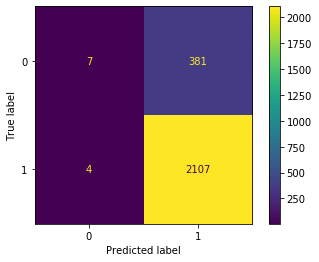

In [596]:
plot_confusion_matrix(Naive2, Test_X_Tfidf2, Test_Y2,values_format='d')
plt.show()